## First we import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Then we read in the data. I am using pandas here.

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   object 
 1   ela                939 non-null    float64
 2   financeAmount      939 non-null    float64
 3   address1           998 non-null    object 
 4   address2           862 non-null    object 
 5   address3           416 non-null    object 
 6   state              1000 non-null   object 
 7   city               1000 non-null   object 
 8   postcode           976 non-null    float64
 9   applicationStatus  1000 non-null   object 
 10  netSalary          1000 non-null   float64
 11  loanTenure         1000 non-null   int64  
 12  interestRate       1000 non-null   int64  
 13  loanApplied        1000 non-null   int64  
 14  jobTitle           1000 non-null   object 
 15  loanReason         1000 non-null   object 
dtypes: float64(4), int64(3), 

## Seems like the data is not much. There are null values, but let's take  a look at the data first

In [4]:
data.head(10)

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION
5,01a402d8-9f3a-4385-ab58-ee1c6928ce93,40000.0,10000.0,110 LORONG 2 TAMAN BAKAR ARANG,NaN,NaN,KEDAH,SUNGAI PETANI,8000.0,REJECTED,5000.0,24,18,10000,MANAGER,DEBTS CONSOLIDATION
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,NO.47 TAMAN SUNGAI TENGAH,LORONG SUNGAI TENGAH 2B1,JALAN SUNGAI TENGAH MATANG,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION
7,01b74664-72a7-43b1-bd51-82c6dc17299a,12000.0,1000.0,KM 7.6 JALAN TEBING TINGGI 1,BUKIT KATIL,MELAKA,MELAKA,AYER KEROH,75450.0,REJECTED,2081.0,12,18,1000,DRIVER,RENOVATION
8,01ddc10b-5a18-41bb-b5dd-0e0064a9b55f,15000.0,2000.0,LOT 223-D,KAMPUNG JIMAH LAMA,NaN,NEGERI SEMBILAN,SEREMBAN,71950.0,APPROVED,2000.0,18,18,2500,LOGISTICS AND PLANNING ASSISTANT,OTHER USAGE
9,02076436-bde5-4eef-856e-2042ef045ef9,25000.0,2000.0,"LOT 6063D, JALAN SELAMAT,","KAMPUNG SUNGAI RAMAL DALAM,",43000 KAJANG,SELANGOR,KAJANG,43000.0,REJECTED,3400.0,18,18,2000,GROUP CORPORATE COMMUNICATION EXECUTIVE,DEBTS CONSOLIDATION


## A few things to note here:
<br>

1. The ID column can be dropped immediately.
<br>

2. Address 1&2&3, city and postcode may contribute to someone's loan being approved or rejected (house size, how well developed the particular city/postcode is), but since there are some null values in them, filling them up may be very challenging. One hot encoding them may also make the dataset real messy. Using the state column would suffice, since there are GDP by state data already available everywhere on the net.
<br>

3. jobTitle might also contribute to loan getting approved or rejected where jobs can be categorised as being blue or white collar. However, it probably has to be done manually to accurately categorise the jobs (again, one hot encoding them will be messy). There is already a better column to represent jobTitle, which is netSalary. netSalary straightaway gives the salary that is representing each jobs, with the added bonus it being continuous rather than categorical.

In [5]:
df = data.drop(['id', 'address1', 'address2', 'address3', 'city', 'postcode','jobTitle'], axis = 1)

In [6]:
df.head()

,ela,financeAmount,state,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,loanReason
0,5000.0,5000.0,TERENGGANU,REJECTED,1900.0,18,18,5000,DEBTS CONSOLIDATION
1,0.0,0.0,SELANGOR,REJECTED,7260.0,24,18,10000,RENOVATION
2,49000.0,6000.0,KELANTAN,REJECTED,4000.0,24,18,6000,DEBTS CONSOLIDATION
3,6000.0,1000.0,KEDAH,APPROVED,1200.0,12,18,1500,DEBTS CONSOLIDATION
4,0.0,0.0,NEGERI SEMBILAN,REJECTED,3948.0,24,18,5000,DEBTS CONSOLIDATION


#### Let's see how many values there are in each categorical variables.

In [7]:
df['state'].value_counts()

state
SELANGOR           238
JOHOR              107
KEDAH               99
PENANG              93
KUALA LUMPUR        86
PERAK               83
NEGERI SEMBILAN     70
MELAKA              65
SARAWAK             36
PAHANG              33
SABAH               24
KELANTAN            22
PUTRAJAYA           15
TERENGGANU          14
PERLIS              11
LBN                  3
KUANTAN              1
Name: count, dtype: int64

#### 17 states! Whose from the state of Kuantan? lmao
<br>

Initially I was thinking about grouping federal territories together with their respective states, however I think that would skew the entire data more towards Selangor. So I am just going to change the lonely Kuantanese's state to Pahang.

In [8]:
df.loc[df['state'] == 'KUANTAN', 'state'] = 'PAHANG'

In [9]:
df['state'].value_counts()

state
SELANGOR           238
JOHOR              107
KEDAH               99
PENANG              93
KUALA LUMPUR        86
PERAK               83
NEGERI SEMBILAN     70
MELAKA              65
SARAWAK             36
PAHANG              34
SABAH               24
KELANTAN            22
PUTRAJAYA           15
TERENGGANU          14
PERLIS              11
LBN                  3
Name: count, dtype: int64

### Kuantan guy finally identified as Pahang guy now

In [10]:
df['loanReason'].value_counts()

loanReason
DEBTS CONSOLIDATION    322
OTHER USAGE            206
EDUCATION              138
EXPAND BUSINESS        131
RENOVATION             130
MEDICAL EXPENSES        73
Name: count, dtype: int64

## loanReason looks good to me

In [11]:
df['applicationStatus'].value_counts()

applicationStatus
REJECTED    788
APPROVED    212
Name: count, dtype: int64

### Here we have an almost 80/20 split between the labels. This dataset has imbalanced classes.

### While we're at it let's change the label to 1 and 0.
### Approved is 1, Rejected is 0

In [12]:
df['applicationStatus'] = df['applicationStatus'].map({'APPROVED': 1, 'REJECTED': 0})

In [13]:
df['applicationStatus'].value_counts()

applicationStatus
0    788
1    212
Name: count, dtype: int64

## Correlation matrix
<br>

### Let's see how each variables correlate with each others

<Axes: >

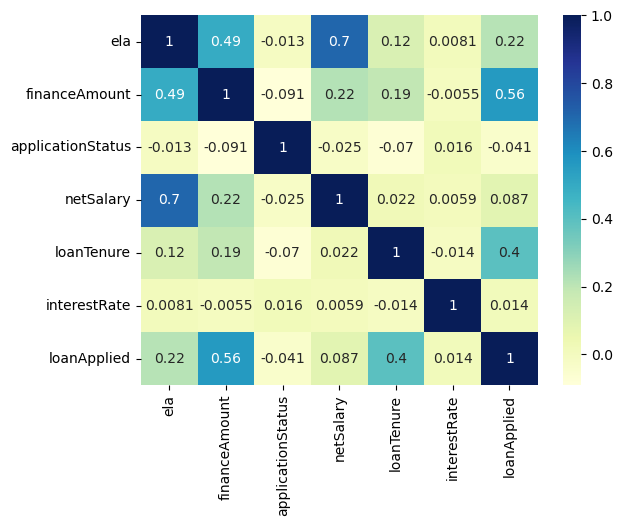

In [14]:
sns.heatmap(df.corr(numeric_only = True), cmap = 'YlGnBu', annot = True)



In [15]:
import numpy as np
# Assuming df is your DataFrame
correlation_matrix = df.corr(numeric_only = True)

# Exclude upper triangular part to avoid repeating pairs
lower_triangle_mask = np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool)
correlation_matrix_lower = correlation_matrix.where(lower_triangle_mask)

# Use stack() to reshape the lower triangular part of the correlation matrix into a Series
correlation_series = correlation_matrix_lower.stack()

# Sort the correlations in descending order
sorted_correlation_series = correlation_series.sort_values(ascending=False)

# Print the top few correlation pairs
print("Top correlation pairs:")
print(sorted_correlation_series.head())

Top correlation pairs:
netSalary      ela              0.703739
loanApplied    financeAmount    0.560159
financeAmount  ela              0.493031
loanApplied    loanTenure       0.396520
netSalary      financeAmount    0.218131
dtype: float64


## Let's dive deeper into the top 2 correlation pairs:
<br>

1. netSalary - ela
<br>

>There is a very high positive correlation here at 0.7.
<br>

>If the person applying has a high net salary, the maximum loan amount the person is able to apply tends to be high as well.

2. loanApplied - financeAmount
<br>

>There is a high positive correlation here at 0.56.
<br>

>If the person is applying for a high amount of loan, there is a good chance that the approved loan amount will be high as well.

## ~~~~~~~~~~~~~~~~~~~~~
## Exploratory Data Analysis. 
## ~~~~~~~~~~~~~~~~~~~~~
<br>

#### Gonna check for some outliers for the numerical data.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ela                939 non-null    float64
 1   financeAmount      939 non-null    float64
 2   state              1000 non-null   object 
 3   applicationStatus  1000 non-null   int64  
 4   netSalary          1000 non-null   float64
 5   loanTenure         1000 non-null   int64  
 6   interestRate       1000 non-null   int64  
 7   loanApplied        1000 non-null   int64  
 8   loanReason         1000 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 70.4+ KB


In [17]:
# showing the descriptive analysis when the label is 1
df[df['applicationStatus'] == 1].describe()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied
count,212.000000,212.000000,212.0,212.000000,212.000000,212.0,212.000000
mean,15400.943396,2969.811321,1.0,2912.188160,21.367925,18.0,5324.056604
std,12682.211263,1907.017214,0.0,1375.202181,5.162434,0.0,3366.919719
min,0.000000,1000.000000,1.0,1200.000000,6.000000,18.0,1000.000000
25%,6750.000000,1500.000000,1.0,2000.000000,24.000000,18.0,2175.000000
50%,12000.000000,2100.000000,1.0,2500.000000,24.000000,18.0,5000.000000
75%,21000.000000,4000.000000,1.0,3500.000000,24.000000,18.0,10000.000000
max,89000.000000,10000.000000,1.0,9900.000000,24.000000,18.0,10000.000000


In [18]:
# showing the descriptive analysis when the label is 0
df[df['applicationStatus'] == 0].describe()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied
count,727.000000,727.000000,788.0,788.000000,788.000000,788.000000,788.000000
mean,16122.420908,3696.836314,0.0,3604.099048,22.157360,17.996193,5650.888325
std,26439.704901,3651.325795,0.0,12858.940887,4.443702,0.106871,3224.152298
min,0.000000,0.000000,0.0,450.000000,6.000000,15.000000,1000.000000
25%,0.000000,0.000000,0.0,1985.250000,24.000000,18.000000,3000.000000
50%,9000.000000,3000.000000,0.0,2783.550000,24.000000,18.000000,5000.000000
75%,24000.000000,6000.000000,0.0,3782.975000,24.000000,18.000000,10000.000000
max,397000.000000,10000.000000,0.0,359313.000000,24.000000,18.000000,10000.000000


#### financeAmount, loanTenure, loanApplied all looked good.
#### ela and netSalary does seem like having some extreme outliers.

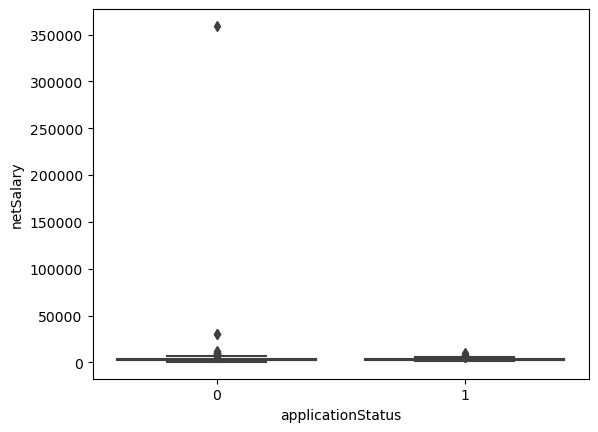

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
g = sns.boxplot(data = df, x = 'applicationStatus', y = 'netSalary' )


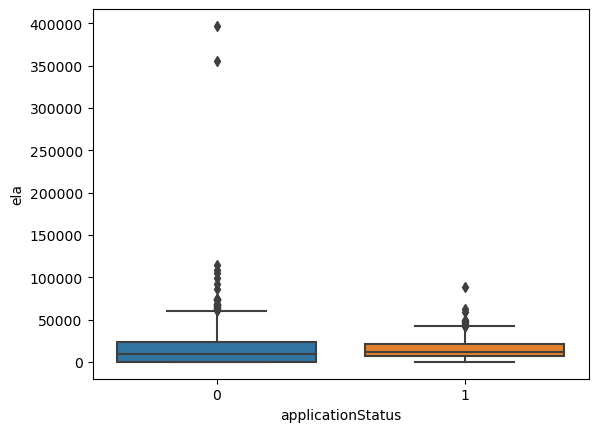

In [20]:
g = sns.boxplot(data = df, x = 'applicationStatus', y = 'ela' )


### I am going to remove the outliers based on the netSalary column. The extreme values might be caused by user typo


In [21]:
# calculating q1 and q3
percentile25 = df['netSalary'].quantile(0.25)
percentile75 = df['netSalary'].quantile(0.75)

In [22]:
print(percentile25)
print(percentile75)

1990.4424999999999
3700.0


In [23]:
# calculating interquartile range
iqr = percentile75 - percentile25
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)


In [24]:
print(upper_limit)
print(lower_limit)

6264.33625
-573.8937500000004


# ~~~~~~~~~~~~~~~~~~~~~~~~~
# Data Cleaning and Preprocessing
# ~~~~~~~~~~~~~~~~~~~~~~~~~

### Outliers above the upper limit will be removed

In [88]:
df[df['netSalary'] > upper_limit]

,ela,financeAmount,state,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,loanReason
1,0.00,0.00,SELANGOR,0,7260.00,24,18,10000,RENOVATION
11,0.00,0.00,MELAKA,0,7602.00,24,18,4500,EDUCATION
30,NaN,NaN,PAHANG,0,6725.51,24,18,10000,EXPAND BUSINESS
66,0.00,0.00,KUALA LUMPUR,0,8000.00,24,18,10000,EXPAND BUSINESS
72,0.00,0.00,KUALA LUMPUR,0,10500.00,18,18,4000,MEDICAL EXPENSES
78,99000.00,10000.00,SELANGOR,0,7500.00,24,18,10000,EXPAND BUSINESS
146,65000.00,10000.00,PENANG,0,8000.00,24,18,10000,EXPAND BUSINESS
187,89000.00,5000.00,JOHOR,1,7500.00,24,18,10000,RENOVATION
223,62000.00,2000.00,PAHANG,1,7019.00,24,18,10000,EDUCATION
238,356000.00,5000.00,SELANGOR,0,30000.00,24,18,5000,RENOVATION


In [26]:
new_df = df[df['netSalary'] < upper_limit]

In [27]:
new_df.describe()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied
count,902.000000,902.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,14298.226164,3449.223947,0.215481,2842.227040,21.960251,17.996862,5449.790795
std,15303.035076,3279.217588,0.411371,1194.787826,4.645607,0.097027,3229.901196
min,0.000000,0.000000,0.000000,450.000000,6.000000,15.000000,1000.000000
25%,1000.000000,1000.000000,0.000000,1936.000000,24.000000,18.000000,2500.000000
50%,10000.000000,2500.000000,0.000000,2599.500000,24.000000,18.000000,5000.000000
75%,21000.000000,5000.000000,0.000000,3500.000000,24.000000,18.000000,10000.000000
max,74000.000000,10000.000000,1.000000,6261.400000,24.000000,18.000000,10000.000000


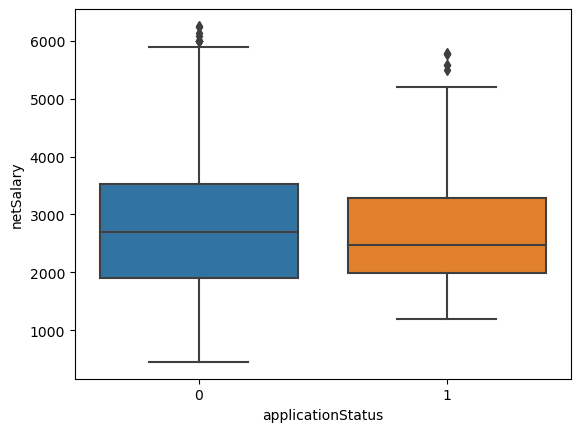

In [28]:
g = sns.boxplot(data = new_df, x = 'applicationStatus', y = 'netSalary' )

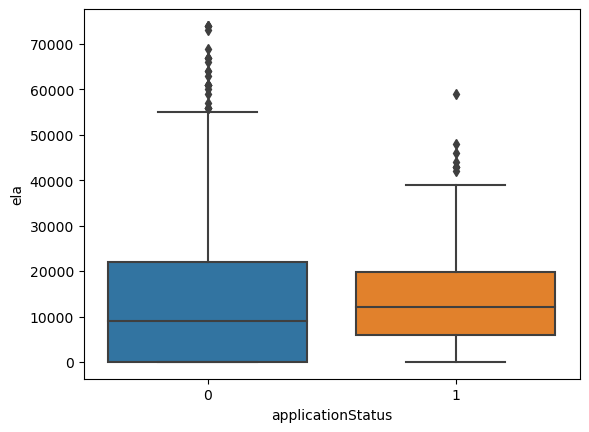

In [29]:
g = sns.boxplot(data = new_df, x = 'applicationStatus', y = 'ela' )

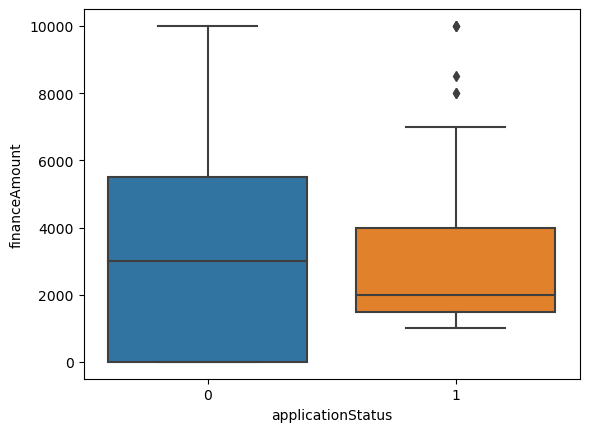

In [30]:
g = sns.boxplot(data = new_df, x = 'applicationStatus', y = 'financeAmount' )

### The data looks good now. There are still some outliers within the dataset, but let's just retain it as natural variation in the population.
<br>

### NaN values still have to be dealt with

In [31]:
new_df.isna().sum()

ela                  54
financeAmount        54
state                 0
applicationStatus     0
netSalary             0
loanTenure            0
interestRate          0
loanApplied           0
loanReason            0
dtype: int64

In [32]:
cleaned_df = new_df.dropna(subset=["financeAmount"])

In [33]:
cleaned_df.isna().sum()

ela                  0
financeAmount        0
state                0
applicationStatus    0
netSalary            0
loanTenure           0
interestRate         0
loanApplied          0
loanReason           0
dtype: int64

In [34]:
totalRemoved = len(new_df) - len(cleaned_df)
print(totalRemoved)

54


### It seems like when there are null values in ela, the respective row will also have null value in financeAmount. 
<br>

### This probably suggests that these rows are loan applications that the users filled in halfway and then the system autosaved it (maybe?).
<br>

### If thats the case, replacing the null values might be the wrong move here since there are too much of them and it will skew the data wrongly. So its best just to remove the rows.

In [35]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ela                902 non-null    float64
 1   financeAmount      902 non-null    float64
 2   state              902 non-null    object 
 3   applicationStatus  902 non-null    int64  
 4   netSalary          902 non-null    float64
 5   loanTenure         902 non-null    int64  
 6   interestRate       902 non-null    int64  
 7   loanApplied        902 non-null    int64  
 8   loanReason         902 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 70.5+ KB


#### Making one hot encoding functions based on the categorical columns state and loanReason

In [36]:
def oneHotter_state(X):
    X = pd.get_dummies(X, columns = ['state'], prefix = '', prefix_sep = '')
    return X

In [37]:
def oneHotter_loanReason(X):
    X = pd.get_dummies(X, columns = ['loanReason'], prefix = '', prefix_sep = '')
    return X

#### Resetting indices. Else StratifiedShuffleSplit will complain about indices missing.

In [38]:
cleaned_df = cleaned_df.reset_index(drop = True)

#### oneHotter_state is applied earlier before splitting to prevent losing columns that has lesser count (i.e. LBN column) to either training or testing set

In [39]:
cleaned_df = oneHotter_state(cleaned_df)

#### StratifiedShuffleSplit is used to maintain class distribution between applicationStatus and loanReason. This is to reduce bias when it comes to model evaluation

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, KFold

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices, test_indices in split.split(cleaned_df, cleaned_df[["applicationStatus", "loanReason"]]):
    strat_train_set = cleaned_df.loc[train_indices]
    strat_test_set = cleaned_df.loc[test_indices]




In [41]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 613 to 364
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ela                721 non-null    float64
 1   financeAmount      721 non-null    float64
 2   applicationStatus  721 non-null    int64  
 3   netSalary          721 non-null    float64
 4   loanTenure         721 non-null    int64  
 5   interestRate       721 non-null    int64  
 6   loanApplied        721 non-null    int64  
 7   loanReason         721 non-null    object 
 8   JOHOR              721 non-null    bool   
 9   KEDAH              721 non-null    bool   
 10  KELANTAN           721 non-null    bool   
 11  KUALA LUMPUR       721 non-null    bool   
 12  LBN                721 non-null    bool   
 13  MELAKA             721 non-null    bool   
 14  NEGERI SEMBILAN    721 non-null    bool   
 15  PAHANG             721 non-null    bool   
 16  PENANG             721 non-nu

In [42]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 50 to 754
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ela                181 non-null    float64
 1   financeAmount      181 non-null    float64
 2   applicationStatus  181 non-null    int64  
 3   netSalary          181 non-null    float64
 4   loanTenure         181 non-null    int64  
 5   interestRate       181 non-null    int64  
 6   loanApplied        181 non-null    int64  
 7   loanReason         181 non-null    object 
 8   JOHOR              181 non-null    bool   
 9   KEDAH              181 non-null    bool   
 10  KELANTAN           181 non-null    bool   
 11  KUALA LUMPUR       181 non-null    bool   
 12  LBN                181 non-null    bool   
 13  MELAKA             181 non-null    bool   
 14  NEGERI SEMBILAN    181 non-null    bool   
 15  PAHANG             181 non-null    bool   
 16  PENANG             181 non-nul

#### Finalising preprocessing. 
<br>

#### All of the categorical data will be one hot encoded and the data will be splitted into data used for training/testing and their respective labels. 
<br>

#### The data will also be normalised and standardised in this process.
<br>

#### oneHotter_loanReason is applied here because the data is diverse enough to ensure both training and testing sets have all of the one hot encodded loanReason columns



In [43]:
strat_train_set = oneHotter_loanReason(strat_train_set)
strat_test_set = oneHotter_loanReason(strat_test_set)

In [44]:
from sklearn.preprocessing import StandardScaler


X_train_columndrop = strat_train_set.drop(['applicationStatus'], axis = 1)
y_train_label = strat_train_set['applicationStatus']

X_test_columndrop = strat_test_set.drop(['applicationStatus'], axis = 1)
y_test_label = strat_test_set['applicationStatus']
    
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_columndrop)
y_train = y_train_label.to_numpy()

X_test = scaler.fit_transform(X_test_columndrop)
y_test = y_test_label.to_numpy()


In [45]:
len(X_train[0])

28

In [46]:
len(X_test[0])

28

### Training and testing sets are ready to go!

# ~~~~~~~~~~~~~~~~~~~~~~~
# Choosing and training models
# ~~~~~~~~~~~~~~~~~~~~~~~

#### Initially I already had an ML algorithm in mind that I had experience with and I know it would work well in this scenario. However I do want to find out which of classification algorithm works best for this particular case.
<br>

#### I use lazypredict to quickly build a list of basic models to compare which model works better.



In [47]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

lzy_classifier = LazyClassifier(verbose = 1, ignore_warnings = True, custom_metric = precision_score, predictions = True)

#### Note that custom_metric is None as default for a lot of examples out there. However I am focusing on both precision and F1 score for this particular task. I will explain why down below.






In [48]:
scores, lzy_classifier_predict = lzy_classifier.fit(X_train, X_test, y_train, y_test)
scores

  3%|██▊                                                                                | 1/29 [00:00<00:04,  6.40it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8121546961325967, 'Balanced Accuracy': 0.6888501742160279, 'ROC AUC': 0.6888501742160278, 'F1 Score': 0.8023485954996719, 'precision_score': 0.6129032258064516, 'Time taken': 0.15610051155090332}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8453038674033149, 'Balanced Accuracy': 0.7102787456445994, 'ROC AUC': 0.7102787456445994, 'F1 Score': 0.8307337975846263, 'precision_score': 0.76, 'Time taken': 0.06203579902648926}
{'Model': 'BernoulliNB', 'Accuracy': 0.3370165745856354, 'Balanced Accuracy': 0.48519163763066203, 'ROC AUC': 0.48519163763066203, 'F1 Score': 0.3349928156557991, 'precision_score': 0.2198581560283688, 'Time taken': 0.025484800338745117}


 14%|███████████▍                                                                       | 4/29 [00:00<00:03,  6.85it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7734806629834254, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6746871826646701, 'precision_score': 0.0, 'Time taken': 0.3402230739593506}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7900552486187845, 'Balanced Accuracy': 0.6745644599303136, 'ROC AUC': 0.6745644599303136, 'F1 Score': 0.7839701734729358, 'precision_score': 0.5428571428571428, 'Time taken': 0.017001628875732422}
{'Model': 'DummyClassifier', 'Accuracy': 0.7734806629834254, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6746871826646701, 'precision_score': 0.0, 'Time taken': 0.019997119903564453}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.7182320441988951, 'Balanced Accuracy': 0.5677700348432055, 'ROC AUC': 0.5677700348432055, 'F1 Score': 0.7085190675111169, 'precision_score': 0.35294117647058826, 'Time taken': 0.0161135196685791}


 38%|███████████████████████████████                                                   | 11/29 [00:01<00:01, 11.13it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8121546961325967, 'Balanced Accuracy': 0.6371080139372822, 'ROC AUC': 0.6371080139372823, 'F1 Score': 0.7845584379154319, 'precision_score': 0.6842105263157895, 'Time taken': 0.23897123336791992}
{'Model': 'GaussianNB', 'Accuracy': 0.6574585635359116, 'Balanced Accuracy': 0.5371080139372822, 'ROC AUC': 0.5371080139372822, 'F1 Score': 0.6653856588223648, 'precision_score': 0.2765957446808511, 'Time taken': 0.020125865936279297}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.6961325966850829, 'Balanced Accuracy': 0.5017421602787456, 'ROC AUC': 0.5017421602787456, 'F1 Score': 0.6698430313084824, 'precision_score': 0.23076923076923078, 'Time taken': 0.1591043472290039}


 52%|██████████████████████████████████████████▍                                       | 15/29 [00:01<00:01, 12.33it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.7292817679558011, 'Balanced Accuracy': 0.6180313588850174, 'ROC AUC': 0.6180313588850174, 'F1 Score': 0.730427442557016, 'precision_score': 0.40476190476190477, 'Time taken': 0.08759593963623047}
{'Model': 'LabelSpreading', 'Accuracy': 0.7292817679558011, 'Balanced Accuracy': 0.6180313588850174, 'ROC AUC': 0.6180313588850174, 'F1 Score': 0.730427442557016, 'precision_score': 0.40476190476190477, 'Time taken': 0.07087182998657227}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7624309392265194, 'Balanced Accuracy': 0.4928571428571429, 'ROC AUC': 0.4928571428571429, 'F1 Score': 0.6692183792583869, 'precision_score': 0.0, 'Time taken': 0.028110742568969727}
{'Model': 'LinearSVC', 'Accuracy': 0.7734806629834254, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6746871826646701, 'precision_score': 0.0, 'Time taken': 0.10299468040466309}


 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:01<00:00, 19.82it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.7679558011049724, 'Balanced Accuracy': 0.49642857142857144, 'ROC AUC': 0.49642857142857144, 'F1 Score': 0.6719613259668509, 'precision_score': 0.0, 'Time taken': 0.028003215789794922}
{'Model': 'NearestCentroid', 'Accuracy': 0.5359116022099447, 'Balanced Accuracy': 0.5189024390243903, 'ROC AUC': 0.5189024390243903, 'F1 Score': 0.573558241689119, 'precision_score': 0.24096385542168675, 'Time taken': 0.022997140884399414}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6629834254143646, 'Balanced Accuracy': 0.4975609756097561, 'ROC AUC': 0.4975609756097561, 'F1 Score': 0.6549976145788883, 'precision_score': 0.2222222222222222, 'Time taken': 0.019194841384887695}
{'Model': 'Perceptron', 'Accuracy': 0.6906077348066298, 'Balanced Accuracy': 0.49817073170731707, 'ROC AUC': 0.498170731707317, 'F1 Score': 0.6661250135413281, 'precision_score': 0.2222222222222222, 'Time taken': 0.02051067352294922}
{'Model': 'QuadraticDiscriminantAnalysis', '

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:01<00:00, 16.46it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8342541436464088, 'Balanced Accuracy': 0.6686411149825784, 'ROC AUC': 0.6686411149825783, 'F1 Score': 0.809904504043028, 'precision_score': 0.7894736842105263, 'Time taken': 0.3094208240509033}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7734806629834254, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6746871826646701, 'precision_score': 0.0, 'Time taken': 0.013134956359863281}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7734806629834254, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6746871826646701, 'precision_score': 0.0, 'Time taken': 0.028728723526000977}
{'Model': 'SGDClassifier', 'Accuracy': 0.6187845303867403, 'Balanced Accuracy': 0.4603658536585366, 'ROC AUC': 0.46036585365853655, 'F1 Score': 0.6203978272741654, 'precision_score': 0.16666666666666666, 'Time taken': 0.02499699592590332}
{'Model': 'SVC', 'Accuracy': 0.7734806629834254, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6746871826646701, 'p

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 10.61it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,precision_score,Time Taken
Model,,,,,,
LGBMClassifier,0.87,0.78,0.78,0.86,0.76,0.28
XGBClassifier,0.86,0.73,0.73,0.84,0.80,0.52
BaggingClassifier,0.85,0.71,0.71,0.83,0.76,0.06
AdaBoostClassifier,0.81,0.69,0.69,0.80,0.61,0.15
DecisionTreeClassifier,0.79,0.67,0.67,0.78,0.54,0.02
RandomForestClassifier,0.83,0.67,0.67,0.81,0.79,0.31
ExtraTreesClassifier,0.81,0.64,0.64,0.78,0.68,0.24
LabelSpreading,0.73,0.62,0.62,0.73,0.40,0.07
LabelPropagation,0.73,0.62,0.62,0.73,0.40,0.09


In [49]:
scores.sort_values(by = ['precision_score', 'F1 Score'], ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,precision_score,Time Taken
Model,,,,,,
XGBClassifier,0.86,0.73,0.73,0.84,0.80,0.52
RandomForestClassifier,0.83,0.67,0.67,0.81,0.79,0.31
BaggingClassifier,0.85,0.71,0.71,0.83,0.76,0.06
LGBMClassifier,0.87,0.78,0.78,0.86,0.76,0.28
ExtraTreesClassifier,0.81,0.64,0.64,0.78,0.68,0.24
AdaBoostClassifier,0.81,0.69,0.69,0.80,0.61,0.15
DecisionTreeClassifier,0.79,0.67,0.67,0.78,0.54,0.02
LabelSpreading,0.73,0.62,0.62,0.73,0.40,0.07
LabelPropagation,0.73,0.62,0.62,0.73,0.40,0.09


#### From lazypredict we can see that XGBoost and Random Forest is the best performing models in terms of precision and F1 score.
<br>

#### I have ran lazypredict multiple times to see which classifier performs the best. While the top performers keep changing every time I ran lazypredict, I have decided to train both XGBoost and Random Forest and then choose the best performing model. This is due to a few reasons:
<br>

#### 1. The precision score for this iteration of lazypredict is quite high at 79% and 80% for the top two models. Other iterations have lower precision scores.

#### 2. XGB and RF are two very popular models. There are a lot of sources on how to train them properly.






## ~~~~~~~~~~~~~~~~~~
## Training Random Forest
## ~~~~~~~~~~~~~~~~~~

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### GridSearch for searching for the best hyperparameters

In [51]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
# random forest classifier
rf_classifier = RandomForestClassifier()

param_grid = [
    {
        'n_estimators': [10, 100, 200, 500, 800, 1000],
        'max_depth': [None, 5, 10],
        'max_features': ['auto', 'sqrt'],
        'bootstrap' : [True, False]
    }
]
rf_grid_search = GridSearchCV(rf_classifier, param_grid, cv=kf, scoring='precision',
                           refit='precision', return_train_score=True, verbose = 1)

rf_grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(rf_grid_search.cv_results_)






Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [52]:
rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 10}

In [53]:
rf_classifier_predict = rf_grid_search.best_estimator_.predict(X_test)

In [54]:
rf_cv_scores = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv = kf )

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_classifier_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_classifier_predict))
print('\n')
print("=== All AUC Scores ===")
print(rf_cv_scores)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_scores.mean())

=== Confusion Matrix ===
[[136   4]
 [ 27  14]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       140
           1       0.78      0.34      0.47        41

    accuracy                           0.83       181
   macro avg       0.81      0.66      0.69       181
weighted avg       0.82      0.83      0.80       181



=== All AUC Scores ===
[0.8        0.77777778 0.80555556 0.81944444 0.75      ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7905555555555557


#### The RF model is now trained with the best hyperparameters found using GridSearch.
<br>


#### However, the precision is worsen by 0.01. This may be due to the randomness in the testing data. 

## ~~~~~~~~~~~~~~~
## RF Feature Importance
## ~~~~~~~~~~~~~~~

In [57]:
feature_list = X_train_columndrop.columns

# Get numerical feature importances
importances = list(rf_grid_search.best_estimator_.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: financeAmount        Importance: 0.24
Variable: ela                  Importance: 0.21
Variable: netSalary            Importance: 0.16
Variable: loanApplied          Importance: 0.12
Variable: loanTenure           Importance: 0.03
Variable: KEDAH                Importance: 0.02
Variable: KUALA LUMPUR         Importance: 0.02
Variable: PENANG               Importance: 0.02
Variable: DEBTS CONSOLIDATION  Importance: 0.02
Variable: EDUCATION            Importance: 0.02
Variable: EXPAND BUSINESS      Importance: 0.02
Variable: OTHER USAGE          Importance: 0.02
Variable: JOHOR                Importance: 0.01
Variable: MELAKA               Importance: 0.01
Variable: NEGERI SEMBILAN      Importance: 0.01
Variable: PAHANG               Importance: 0.01
Variable: PERAK                Importance: 0.01
Variable: SARAWAK              Importance: 0.01
Variable: SELANGOR             Importance: 0.01
Variable: MEDICAL EXPENSES     Importance: 0.01
Variable: RENOVATION           Importanc

#### Feature importance from the RF suggests that financeAmount, ela, netSalary and loanApplied are all crucial features when the model is making a decision on approving or rejecting a loan application.

## ~~~~~~~~~~~~~
## Training XGBoost
## ~~~~~~~~~~~~~

In [58]:
import xgboost as xgb


### GridSearch for searching for the best hyperparameters

In [59]:
xgb_classifier = xgb.XGBClassifier()

xgb_param_grid = [
    {
        'n_estimators': [10, 100, 200, 500, 800, 1000],
        'max_depth': [None, 5, 10],
        'max_features': ['auto', 'sqrt'],
        'bootstrap' : [True, False]
    }
]
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=kf, scoring='precision',
                           refit='precision', return_train_score=True, verbose = 1)

xgb_grid_search.fit(X_train, y_train)

xgb_results_df = pd.DataFrame(xgb_grid_search.cv_results_)
print(xgb_grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}


In [60]:
xgb_classifier_predict = xgb_grid_search.best_estimator_.predict(X_test)

In [61]:
xgb_cv_scores = cross_val_score(xgb_grid_search.best_estimator_, X_train, y_train, cv = kf )

In [62]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, xgb_classifier_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, xgb_classifier_predict))
print('\n')
print("=== All AUC Scores ===")
print(xgb_cv_scores)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGBoost: ", xgb_cv_scores.mean())


=== Confusion Matrix ===
[[139   1]
 [ 21  20]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       140
           1       0.95      0.49      0.65        41

    accuracy                           0.88       181
   macro avg       0.91      0.74      0.79       181
weighted avg       0.89      0.88      0.86       181



=== All AUC Scores ===
[0.85517241 0.81944444 0.875      0.86805556 0.82638889]


=== Mean AUC Score ===
Mean AUC Score - XGBoost:  0.8488122605363984


#### The precision score for the APPROVED label goes up to 95% after finding the best hyperparameters. More loan applications are classified correctly while false positives are lesser compared to RF. All in all this is a better model for loan application purposes compared to RF.

## ~~~~~~~~~~~~~~~~~~~~~~
## XGBoost Feature Importance
## ~~~~~~~~~~~~~~~~~~~~~~

In [63]:
# Get numerical feature importances
importances = list(xgb_grid_search.best_estimator_.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: loanApplied          Importance: 0.2199999988079071
Variable: financeAmount        Importance: 0.20999999344348907
Variable: ela                  Importance: 0.10999999940395355
Variable: loanTenure           Importance: 0.07000000029802322
Variable: PENANG               Importance: 0.05999999865889549
Variable: EDUCATION            Importance: 0.05000000074505806
Variable: OTHER USAGE          Importance: 0.05000000074505806
Variable: RENOVATION           Importance: 0.05000000074505806
Variable: MELAKA               Importance: 0.03999999910593033
Variable: SELANGOR             Importance: 0.03999999910593033
Variable: netSalary            Importance: 0.029999999329447746
Variable: KEDAH                Importance: 0.019999999552965164
Variable: EXPAND BUSINESS      Importance: 0.019999999552965164
Variable: KUALA LUMPUR         Importance: 0.009999999776482582
Variable: interestRate         Importance: 0.0
Variable: JOHOR                Importance: 0.0
Variable: KELANTAN   

{0: 'ela', 1: 'financeAmount', 2: 'netSalary', 3: 'loanTenure', 4: 'interestRate', 5: 'loanApplied', 6: 'JOHOR', 7: 'KEDAH', 8: 'KELANTAN', 9: 'KUALA LUMPUR', 10: 'LBN', 11: 'MELAKA', 12: 'NEGERI SEMBILAN', 13: 'PAHANG', 14: 'PENANG', 15: 'PERAK', 16: 'PERLIS', 17: 'PUTRAJAYA', 18: 'SABAH', 19: 'SARAWAK', 20: 'SELANGOR', 21: 'TERENGGANU', 22: 'DEBTS CONSOLIDATION', 23: 'EDUCATION', 24: 'EXPAND BUSINESS', 25: 'MEDICAL EXPENSES', 26: 'OTHER USAGE', 27: 'RENOVATION'}


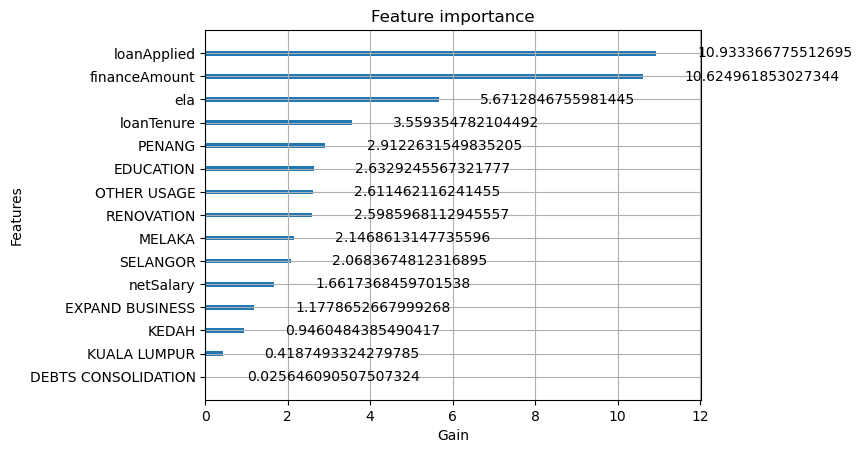

In [82]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


# feat importance with names f1,f2,...
axsub = plot_importance(xgb_grid_search.best_estimator_, importance_type = 'gain', xlabel= 'Gain')

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(feature_list))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()

#### Feature importance from XGBoost suggests that loanApplied and financeAmount the the main features, followed by ela and loanTenure when deciding which loan application to be accepted or rejected.

# ~~~~~~~~~~~~~~~~~~~~~
# Discussion and Conclusion
# ~~~~~~~~~~~~~~~~~~~~~



## Why choose precision as oppose to accuracy as the main evaluation metrics?
> Choose precision is highly based on CONTEXT.
>
> In the context of loan application, we want to prioritise in identifying applicants that has HIGH LIKELIHOOD OF REPAYMENT. 
>
> However the decision in choosing evaluation metrics may change depending on the surrounding economic climate
> 
> Below is my naive explanation on choosing evaluation metrics in relation to a country's economic performance in terms of loan application. I am no financial expert and I might be wrong but I hope this makes sense
> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
>
> Let's say we are a bank in the US. Currently the US federal interest rate has hiked to 5.25% - 5.5%. We will be much more 'profitable' if we just hold our cash in our cash reserves. In that case we would have to charge more interest rate towards people that wants to loan money from us. This means that we will have to be more cautious on who we lend this money to, and we want to be ABSOLUTELY SURE that the person that we are lending money to will repay us back with high interest rates rather than default on the loan. In this case, precision as the evaluation metrics makes sense. We dont want false positives, i.e. client that might be able to repay the money, ended up defaulting the loan.
>
> Let's switch to another country: Japan. Japan has near 0% and their local economy climate has been stagnant after the bubble era in the early 90s. The Bank of Japan absolutely want to encourage spending to boost their economy. Let's say we are the BoJ, we want to capture each and every opportunity possible to identify more possible clients that would borrow money from us. Using solely prediction as the evaluation metrics here is not suitable since we want MORE GOOD CLIENTS, and we might accidentally filtered out potential clients by categorising them as false negatives when they are actually able to repay the loan. In this case, F1 score might be the more suitable metrics to use (or recall if we are desperate)
>
> I would consider the situation faced by BoJ a very far outlier. Therefore, for the purpose of loan application classification in Malaysia, I think using precision as evaluation metrics is the most suitable out of all of the metrics.
>

> Accuracy is NOT useful here as the accuracy metrics does not take the costs of false positive and false negatives into consideration. We would want to prioritise reducing false positives to ensure that the correctly classified clients are actually capable of repaying the loan, as any chances of a client defaulting on the loan is considered as a huge loss, which is why precision is better as the evaluation metric for this case.


## Dataset issue 
> The dataset is quite small for a machine learning task. There is not much representation for some of the data entry resulting a lot of randomness when splitting the data into training and testing sets, which probably explains why I get differing results when I run lazypredict several times. I had doubts in removing outliers, but ended up doing it anyway since I want a more balanced distribution of data. Still, it probably ended up removing several potentially useful data. I did try including the outliers but there are not much difference to the performance of both of the models in any significant manner.

## What if we have a larger dataset?
> A larger dataset would probably mean we will spend more time on training the models. We can still afford to use XGBoost for this task and get good results relatively quickly because we have a smaller dataset to train. I would probably choose Random Forest instead if the dataset is significantly larger due to its efficiency and relatively better interpretability compared to XGBoost. However if prediction is the still the sole and only focus without any regards to computational resource I would use XGBoost again.

## XGBoost is the best model here. 


